In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import gamma
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import os
import datetime
from matplotlib.dates import DateFormatter
from IPython.display import display
from glob import glob
import time
import datetime
import concurrent.futures
import sys
np.set_printoptions(threshold=sys.maxsize)
mean = 3.99
std = 2.96
alpha = (mean / std) ** 2
beta = mean / std ** 2
fig = plt.figure(figsize=[15, 5])
row = 1
col = 1
num_fig = 1
import matplotlib.ticker as mticker
step = 7
import scipy.stats
import warnings
warnings.filterwarnings("ignore")
from scipy.signal import correlate
from scipy.signal import correlation_lags
from datetime import timedelta


<Figure size 1500x500 with 0 Axes>

In [21]:
reply_df_liwc = pd.read_csv('Weekly/Illinois_Tweets_Replies/Reply_LIWC_1.csv', index_col=0)
reply_df_liwc = reply_df_liwc.dropna(axis=0, subset=['Replied Tweets Text'])
reply_df_liwc['Tweet Date'] = reply_df_liwc['Tweet Date'].str.replace("'", "").str.replace("T", " ").str.replace("Z", "").str.split(' ').str[0]
reply_df_liwc['Reply_Date'] = reply_df_liwc['Reply_Date'].str.split(' ').str[0]
reply_df_liwc['Tweet Date'] = pd.to_datetime(reply_df_liwc['Tweet Date'])
reply_df_liwc['Reply_Date'] = pd.to_datetime(reply_df_liwc['Reply_Date'])
reply_df_liwc = reply_df_liwc.drop(['Segment'], axis=1)
Tweet_df_liwc = pd.read_csv('Weekly/Illinois_Tweets_Replies/Tweet_LIWC_1.csv', index_col=0)
Tweet_df_liwc = Tweet_df_liwc.drop(['Segment'], axis=1)
Tweet_df_liwc = Tweet_df_liwc.rename(columns={'Tweet_ID': 'Tweet ID'})
Tweet_df_liwc['Date'] = pd.to_datetime(Tweet_df_liwc['Date'])
Tweet_df_liwc = Tweet_df_liwc.sort_values(by='Date')
reply_df_liwc = reply_df_liwc[((reply_df_liwc['Reply_Date'] >= reply_df_liwc['Tweet Date']) & (reply_df_liwc['Reply_Date'] <= reply_df_liwc['Tweet Date'] + timedelta(days=10)))]
reply_df_liwc

reply_df_AS = pd.read_csv('Weekly/Illinois_Tweets_Replies/Reply_AS.csv', index_col=0)
reply_df_AS = reply_df_AS.dropna(axis=0, subset=['Replied Tweets Text'])
reply_df_AS = reply_df_AS.drop(['Segment', 'Replied Tweets Text', 'Tweet Date', 'Reply_Date', 'user_account_id'], axis=1)
reply_df_AS = reply_df_AS.rename(columns={'New_Category': 'Reply_AS'})
Tweet_df_AS = pd.read_csv('Weekly/Illinois_Tweets_Replies/Tweet_AS.csv', index_col=0)
Tweet_df_AS = Tweet_df_AS.drop(['Segment'], axis=1)
Tweet_df_AS = Tweet_df_AS.rename(columns={'Tweet_ID': 'Tweet ID'})
Tweet_df_AS = Tweet_df_AS.rename(columns={'New_Category': 'Tweet_AS'})
Tweet_df_AS['Date'] = pd.to_datetime(Tweet_df_AS['Date'])
Tweet_df_AS = Tweet_df_AS.sort_values(by='Date')
Tweet_df_AS = Tweet_df_AS.drop(['Date', 'Original_Tweet_Text', 'Updated_Clean_Text'], axis=1)
Tweet_df_AS

reply_df_CPL = pd.read_csv('Weekly/Illinois_Tweets_Replies/Reply_CPL.csv', index_col=0)
reply_df_CPL = reply_df_CPL.dropna(axis=0, subset=['Replied Tweets Text'])
reply_df_CPL = reply_df_CPL.drop(['Segment', 'Replied Tweets Text', 'Tweet Date', 'Reply_Date', 'user_account_id'], axis=1)
reply_df_CPL = reply_df_CPL.rename(columns={'New_Category': 'Reply_CPL'})
Tweet_df_CPL = pd.read_csv('Weekly/Illinois_Tweets_Replies/Tweet_CPL.csv', index_col=0)
Tweet_df_CPL = Tweet_df_CPL.drop(['Segment'], axis=1)
Tweet_df_CPL = Tweet_df_CPL.rename(columns={'Tweet_ID': 'Tweet ID'})
Tweet_df_CPL = Tweet_df_CPL.rename(columns={'New_Category': 'Tweet_CPL'})
Tweet_df_CPL['Date'] = pd.to_datetime(Tweet_df_CPL['Date'])
Tweet_df_CPL = Tweet_df_CPL.sort_values(by='Date')
Tweet_df_CPL = Tweet_df_CPL.drop(['Date', 'Original_Tweet_Text', 'Updated_Clean_Text'], axis=1)
reply_df_CPL

reply_df_Big2_agency = pd.read_csv('Weekly/Illinois_Tweets_Replies/Reply_agency.csv', index_col=0)
reply_df_Big2_agency = reply_df_Big2_agency.dropna(axis=0, subset=['Replied Tweets Text'])
reply_df_Big2_agency = reply_df_Big2_agency.drop(['Segment', 'Replied Tweets Text', 'Tweet Date', 'Reply_Date', 'user_account_id'], axis=1)
reply_df_Big2_agency = reply_df_Big2_agency.rename(columns={'New_Category': 'Reply_Big2_agency'})
Tweet_df_Big2_agency  = pd.read_csv('Weekly/Illinois_Tweets_Replies/Tweet_agency.csv', index_col=0)
Tweet_df_Big2_agency  = Tweet_df_Big2_agency.drop(['Segment'], axis=1)
Tweet_df_Big2_agency = Tweet_df_Big2_agency.rename(columns={'Tweet_ID': 'Tweet ID'})
Tweet_df_Big2_agency = Tweet_df_Big2_agency.rename(columns={'New_Category': 'Tweet_agency'})
Tweet_df_Big2_agency['Date'] = pd.to_datetime(Tweet_df_Big2_agency['Date'])
Tweet_df_Big2_agency = Tweet_df_Big2_agency.sort_values(by='Date')
Tweet_df_Big2_agency = Tweet_df_Big2_agency.drop(['Date', 'Original_Tweet_Text', 'Updated_Clean_Text'], axis=1)
reply_df_Big2_agency

reply_df_Big2_communion = pd.read_csv('Weekly/Illinois_Tweets_Replies/Reply_value_communion.csv', index_col=0)
reply_df_Big2_communion = reply_df_Big2_communion.dropna(axis=0, subset=['Replied Tweets Text', 'Reply_Date'])
reply_df_Big2_communion = reply_df_Big2_communion.drop(['Segment', 'Replied Tweets Text', 'Tweet Date', 'Reply_Date', 'user_account_id'], axis=1)
reply_df_Big2_communion = reply_df_Big2_communion.rename(columns={'New_Category': 'Reply_Big2_communion'})
Tweet_df_Big2_communion = pd.read_csv('Weekly/Illinois_Tweets_Replies/Tweet_value_communion.csv', index_col=0)
Tweet_df_Big2_communion = Tweet_df_Big2_communion.drop(['Segment'], axis=1)
Tweet_df_Big2_communion = Tweet_df_Big2_communion.rename(columns={'Tweet_ID': 'Tweet ID'})
Tweet_df_Big2_communion = Tweet_df_Big2_communion.rename(columns={'New_Category': 'Tweet_value_communion'})
Tweet_df_Big2_communion['Date'] = pd.to_datetime(Tweet_df_Big2_communion['Date'])
Tweet_df_Big2_communion = Tweet_df_Big2_communion.sort_values(by='Date')
Tweet_df_Big2_communion = Tweet_df_Big2_communion.drop(['Date', 'Original_Tweet_Text', 'Updated_Clean_Text'], axis=1)
reply_df_Big2_communion

reply_df_power = pd.read_csv('Weekly/Illinois_Tweets_Replies/Reply_power.csv', index_col=0)
reply_df_power = reply_df_power.dropna(axis=0, subset=['Replied Tweets Text'])
reply_df_power = reply_df_power.drop(['Segment'], axis=1)
reply_df_power = reply_df_power.rename(columns={'New_Category': 'Reply_power'})
Tweet_df_power = pd.read_csv('Weekly/Illinois_Tweets_Replies/Tweet_power.csv', index_col=0)
Tweet_df_power = Tweet_df_power.drop(['Segment'], axis=1)
Tweet_df_power = Tweet_df_power.rename(columns={'Tweet_ID': 'Tweet ID'})
Tweet_df_power = Tweet_df_power.rename(columns={'New_Category': 'Tweet_power'})
Tweet_df_power['Date'] = pd.to_datetime(Tweet_df_power['Date'])
Tweet_df_power = Tweet_df_power.sort_values(by='Date')
Tweet_df_power = Tweet_df_power.drop(['Date', 'Original_Tweet_Text', 'Updated_Clean_Text'], axis=1)
reply_df_power

# FOR LIWC
reply_df_liwc["mean_reply_i"] = reply_df_liwc.groupby('Tweet ID')['i'].transform('mean')
reply_df_liwc["mean_reply_we"] = reply_df_liwc.groupby('Tweet ID')['we'].transform('mean')
reply_df_liwc["mean_reply_Affect"] = reply_df_liwc.groupby('Tweet ID')['Affect'].transform('mean')
reply_df_liwc["mean_reply_tone_pos"] = reply_df_liwc.groupby('Tweet ID')['tone_pos'].transform('mean')
reply_df_liwc["mean_reply_tone_neg"] = reply_df_liwc.groupby('Tweet ID')['tone_neg'].transform('mean')
reply_df_liwc["mean_reply_emotion"] = reply_df_liwc.groupby('Tweet ID')['emotion'].transform('mean')
reply_df_liwc["mean_reply_emo_pos"] = reply_df_liwc.groupby('Tweet ID')['emo_neg'].transform('mean')
reply_df_liwc["mean_reply_emo_neg"] = reply_df_liwc.groupby('Tweet ID')['emo_neg'].transform('mean')
reply_df_liwc["mean_reply_emo_anx"] = reply_df_liwc.groupby('Tweet ID')['emo_anx'].transform('mean')
reply_df_liwc["mean_reply_emo_anger"] = reply_df_liwc.groupby('Tweet ID')['emo_anger'].transform('mean')
reply_df_liwc["mean_reply_emo_sad"] = reply_df_liwc.groupby('Tweet ID')['emo_sad'].transform('mean')
reply_df_liwc["mean_reply_swear"] = reply_df_liwc.groupby('Tweet ID')['swear'].transform('mean')
reply_df_liwc["mean_reply_Social"] = reply_df_liwc.groupby('Tweet ID')['Social'].transform('mean')
reply_df_liwc["mean_reply_socbehav"] = reply_df_liwc.groupby('Tweet ID')['socbehav'].transform('mean')
reply_df_liwc["mean_reply_prosocial"] = reply_df_liwc.groupby('Tweet ID')['prosocial'].transform('mean')
reply_df_liwc["mean_reply_polite"] = reply_df_liwc.groupby('Tweet ID')['polite'].transform('mean')
reply_df_liwc["mean_reply_conflict"] = reply_df_liwc.groupby('Tweet ID')['conflict'].transform('mean')
reply_df_liwc["mean_reply_swear"] = reply_df_liwc.groupby('Tweet ID')['swear'].transform('mean')
reply_df_liwc["mean_reply_moral"] = reply_df_liwc.groupby('Tweet ID')['moral'].transform('mean')
reply_df_liwc["mean_reply_comm"] = reply_df_liwc.groupby('Tweet ID')['comm'].transform('mean')
reply_df_liwc["mean_reply_money"] = reply_df_liwc.groupby('Tweet ID')['money'].transform('mean')
reply_df_liwc["mean_reply_relig"] = reply_df_liwc.groupby('Tweet ID')['relig'].transform('mean')
reply_df_liwc["mean_reply_death"] = reply_df_liwc.groupby('Tweet ID')['death'].transform('mean')
reply_df_liwc["mean_reply_risk"] = reply_df_liwc.groupby('Tweet ID')['risk'].transform('mean')
reply_df_liwc["mean_reply_focuspast"] = reply_df_liwc.groupby('Tweet ID')['focuspast'].transform('mean')
reply_df_liwc["mean_reply_focusfuture"] = reply_df_liwc.groupby('Tweet ID')['focusfuture'].transform('mean')
reply_df_liwc_mean = reply_df_liwc[['Tweet ID',\
       'mean_reply_i', 'mean_reply_we', 'mean_reply_Affect', 'mean_reply_tone_pos', 'mean_reply_tone_neg',\
       'mean_reply_emotion', 'mean_reply_emo_pos', 'mean_reply_emo_neg', 'mean_reply_emo_anx', 'mean_reply_emo_anger', 'mean_reply_emo_sad',\
       'mean_reply_swear', 'mean_reply_Social', 'mean_reply_socbehav', 'mean_reply_prosocial', 'mean_reply_polite', 'mean_reply_conflict',\
       'mean_reply_moral', 'mean_reply_comm', 'mean_reply_money', 'mean_reply_relig', 'mean_reply_death', 'mean_reply_risk', 'mean_reply_focuspast',\
       'mean_reply_focusfuture']].copy()
reply_df_liwc_mean = reply_df_liwc_mean.drop_duplicates()

# FOR AS
reply_df_AS["mean_reply_AS"] = reply_df_AS.groupby('Tweet ID')['Reply_AS'].transform('mean')
reply_df_AS_mean = reply_df_AS[['Tweet ID', 'mean_reply_AS']].copy()
reply_df_AS_mean = reply_df_AS_mean.drop_duplicates()

# FOR CPL
reply_df_CPL["mean_reply_CPL"] = reply_df_CPL.groupby('Tweet ID')['Reply_CPL'].transform('mean')
reply_df_CPL_mean = reply_df_CPL[['Tweet ID', 'mean_reply_CPL']].copy()
reply_df_CPL_mean = reply_df_CPL_mean.drop_duplicates()

# FOR Big2 Agency
reply_df_Big2_agency["mean_reply_agency"] = reply_df_Big2_agency.groupby('Tweet ID')['Reply_Big2_agency'].transform('mean')
reply_df_Big2_agency_mean = reply_df_Big2_agency[['Tweet ID', 'mean_reply_agency']].copy()
reply_df_Big2_agency_mean = reply_df_Big2_agency_mean.drop_duplicates()

# FOR Big2 Communion
reply_df_Big2_communion["mean_reply_communion"] = reply_df_Big2_communion.groupby('Tweet ID')['Reply_Big2_communion'].transform('mean')
reply_df_Big2_communion_mean = reply_df_Big2_communion[['Tweet ID', 'mean_reply_communion']].copy()
reply_df_Big2_communion_mean = reply_df_Big2_communion_mean.drop_duplicates()

# FOR Power
reply_df_power["mean_reply_power"] = reply_df_power.groupby('Tweet ID')['Reply_power'].transform('mean')
reply_df_power = reply_df_power[['Tweet ID', 'mean_reply_power']].copy()
reply_df_power = reply_df_power.drop_duplicates()

merge_df_reply = reply_df_liwc_mean.merge(reply_df_AS_mean, on="Tweet ID", how='outer').merge(reply_df_CPL_mean, on="Tweet ID", how='outer').merge(reply_df_Big2_agency_mean, on="Tweet ID", how='outer').merge(reply_df_Big2_communion_mean, on="Tweet ID", how='outer').merge(reply_df_power, on="Tweet ID", how='outer')
merge_df_reply = merge_df_reply.fillna(0)
merge_df_reply

merge_df_tweet = Tweet_df_liwc.merge(Tweet_df_AS, on="Tweet ID", how='outer').merge(Tweet_df_CPL, on="Tweet ID", how='outer').merge(Tweet_df_Big2_agency, on="Tweet ID", how='outer').merge(Tweet_df_Big2_communion, on="Tweet ID", how='outer').merge(Tweet_df_power, on="Tweet ID", how='outer')
merge_df_tweet = merge_df_tweet.fillna(0)
merge_df_tweet

merge_df = merge_df_tweet.merge(merge_df_reply, on="Tweet ID", how='outer')
merge_df = merge_df.dropna(axis=0, how='any')
merge_df_wo_text = merge_df.drop(['Original_Tweet_Text', 'Updated_Clean_Text', 'Tweet ID'], axis=1)

merge_df


,Date,Tweet ID,Original_Tweet_Text,Updated_Clean_Text,i,we,Affect,tone_pos,tone_neg,emotion,...,mean_reply_death,mean_reply_risk,mean_reply_focuspast,mean_reply_focusfuture,mean_reply_AS,mean_reply_CPL,mean_reply_agency,mean_reply_communion,mean_reply_power,author_name
0,2020-03-01,1234189524454068225,Medical staff are on the frontlines of viral o...,Medical staff are on the frontlines of viral o...,0.00,0.00,2.33,0.00,2.33,0.00,...,0.568182,0.820455,3.939091,1.490000,1.608182,0.602273,9.334091,7.173182,0.285000,SenatorDurbin
3,2020-03-01,1233938224575320067,State of Illinois Public Health Officials Anno...,State of Illinois Public Health Officials Anno...,0.00,0.00,5.88,5.88,0.00,0.00,...,1.281667,0.000000,0.538333,0.926667,0.725000,0.725000,1.988333,1.263333,1.281667,GovPritzker
4,2020-03-01,1234148673497505793,"According to @CDCgov, it's important to wash y...",According to CDCgov it s important to wash you...,0.00,0.00,2.44,2.44,0.00,0.00,...,0.000000,3.845000,2.780000,2.780000,0.000000,0.000000,9.400000,13.245000,0.000000,CongressmanRaja
7,2020-03-02,1234564977819889667,I am continuing to monitor #COVID19. Our offic...,I am continuing to monitor COVID19 Our offices...,5.00,5.00,2.50,2.50,0.00,0.00,...,0.732857,1.251429,1.180000,2.102857,0.714286,0.447143,6.432857,4.142857,0.000000,SenatorDurbin
8,2020-03-02,1234583054720684033,While the risk to the general public in the U....,While the risk to the general public in the U ...,2.94,0.00,2.94,2.94,0.00,2.94,...,0.000000,1.545000,0.286000,1.034000,0.455000,0.286000,6.000000,4.398000,0.000000,IDPH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9478,2023-04-03,1642992946902360067,Severe weather hit communities all across Illi...,Severe weather hit communities all across Illi...,2.50,0.00,12.50,2.50,10.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GovPritzker
9479,2023-04-04,1643345443244457985,With a provision in the 2020 COVID relief pack...,With a provision in the 2020 COVID relief pack...,0.00,2.22,8.89,4.44,4.44,0.00,...,0.000000,0.438947,1.385789,0.154737,6.315789,0.146316,1.491579,0.585263,0.707895,RepUnderwood
9480,2023-04-05,1643655307258675200,With severe weather and storms expected to con...,With severe weather and storms expected to con...,2.86,5.71,8.57,5.71,2.86,0.00,...,0.000000,0.000000,0.000000,0.000000,3.700000,0.000000,3.700000,0.000000,0.000000,RepCasten
9482,2023-04-10,1645518746876796929,Another day that started with a mass shooting....,Another day that started with a mass shooting ...,1.89,3.77,9.43,0.00,9.43,3.77,...,0.768250,0.478500,1.298000,0.642500,2.008250,0.212250,3.749000,3.392500,0.080750,SenatorDurbin


# Date-wise

In [5]:
import tweepy, json, glob, pickle, pendulum
from datetime import timedelta
import requests
import os
import json
import pandas as pd
import csv
import datetime
import dateutil.parser
import unicodedata
import time

os.environ['TOKEN'] = 'AAAAAAAAAAAAAAAAAAAAAMbGowEAAAAAfjvpTk4ECTFfOHZWyMEtmY77Y4A%3DapbK97SBeY0ruSDgHVW8RK2QDzDI2HbngkymyFjdUaZ5uVa31j'

def auth():
    return os.getenv('TOKEN')

bearer_token = auth()

def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

headers = create_headers(bearer_token)

def get_userID_of_particular_tweet_id(tweetID, max_results = 500):
    #Change to the endpoint you want to collect data from
    search_url = "https://api.twitter.com/2/tweets/{}".format(tweetID)
    query_params = {'tweet.fields': 'author_id',
                    'pagination_token': {} }
    return (search_url, query_params)

def connect_to_particular_tweet_id_endpoint(url, headers, params=None, next_token = None):
    response = requests.request("GET", url, headers = headers, params = params)
    time.sleep(5)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

temp_temp_df = merge_df[['Date', 'Tweet ID', 'Original_Tweet_Text', 'Updated_Clean_Text']]
idx = temp_temp_df[((temp_temp_df['Date'] >= '2020-03-01') & (temp_temp_df['Date'] <= '2021-12-31'))]
idx.reset_index(drop=True)
tweetIDs = idx['Tweet ID'].tolist()

verified_userID_info = {}

for tweetID in tweetIDs:
    replies_url = get_userID_of_particular_tweet_id(tweetID, max_results = 500)
    replies_json_response = connect_to_particular_tweet_id_endpoint(replies_url[0], headers, replies_url[1])
    json_str = json.dumps(replies_json_response, indent=4, sort_keys=True)
    resp = json.loads(json_str)
    if resp.get('data') is not None:
        verified_userID_info[tweetID] = resp.get('data').get('author_id')

Exception: (403, '{"client_id":"27510470","detail":"When authenticating requests to the Twitter API v2 endpoints, you must use keys and tokens from a Twitter developer App that is attached to a Project. You can create a project via the developer portal.","registration_url":"https://developer.twitter.com/en/docs/projects/overview","title":"Client Forbidden","required_enrollment":"Appropriate Level of API Access","reason":"client-not-enrolled","type":"https://api.twitter.com/2/problems/client-forbidden"}')

In [ ]:
import json

with open('verified_userID_info_Illinois.json', 'w') as fp:
    json.dump(verified_userID_info, fp)

In [ ]:
idx.columns = ['Date', 'Tweet_ID', 'Original_Tweet_Text', 'Updated_Clean_Text']
idx['author_id'] = idx.Tweet_ID.map(verified_userID_info)
idx = idx.dropna().reset_index(drop=True).sort_values(by='Date')
idx

In [ ]:
def get_username_of_particular_user_id(userID, max_results = 500):
    #Change to the endpoint you want to collect data from
    search_url = "https://api.twitter.com/2/users/{}".format(userID)
    query_params = {'user.fields': 'name',
                    'pagination_token': {} }
    return (search_url, query_params)

def connect_to_particular_user_id_endpoint(url, headers, params=None, next_token = None):
    response = requests.request("GET", url, headers = headers, params = params)
    time.sleep(5)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

top_author_ids = idx['author_id'].value_counts()[idx['author_id'].value_counts() == idx['author_id'].value_counts()]
top_author_ids_df_top_20 = top_author_ids.to_frame().reset_index().head(20)
top_author_ids_df_top_20 = top_author_ids_df_top_20.rename(columns= {'index': 'author_id', 'author_id': 'Number of occurrence'})
authorIDs = top_author_ids_df_top_20['author_id'].tolist()
top_author_ids_df_top_20

verified_username_info = {}
verified_account_name_info = {}

for userID in authorIDs:
    replies_url = get_username_of_particular_user_id(userID, max_results = 500)
    replies_json_response = connect_to_particular_user_id_endpoint(replies_url[0], headers, replies_url[1])
    json_str = json.dumps(replies_json_response, indent=4, sort_keys=True)
    resp = json.loads(json_str)
    if resp.get('data') is not None:
        verified_account_name_info[userID] = resp.get('data').get('name')
        verified_username_info[userID] = resp.get('data').get('username')
        

In [10]:
idx = merge_df
idx

,Date,Tweet ID,Original_Tweet_Text,Updated_Clean_Text,i,we,Affect,tone_pos,tone_neg,emotion,...,mean_reply_death,mean_reply_risk,mean_reply_focuspast,mean_reply_focusfuture,mean_reply_AS,mean_reply_CPL,mean_reply_agency,mean_reply_communion,mean_reply_power,author_name
0,2020-03-01,1234189524454068225,Medical staff are on the frontlines of viral o...,Medical staff are on the frontlines of viral o...,0.00,0.00,2.33,0.00,2.33,0.00,...,0.568182,0.820455,3.939091,1.490000,1.608182,0.602273,9.334091,7.173182,0.285000,CongressmanRaja
3,2020-03-01,1233938224575320067,State of Illinois Public Health Officials Anno...,State of Illinois Public Health Officials Anno...,0.00,0.00,5.88,5.88,0.00,0.00,...,1.281667,0.000000,0.538333,0.926667,0.725000,0.725000,1.988333,1.263333,1.281667,MayorLightfoot
4,2020-03-01,1234148673497505793,"According to @CDCgov, it's important to wash y...",According to CDCgov it s important to wash you...,0.00,0.00,2.44,2.44,0.00,0.00,...,0.000000,3.845000,2.780000,2.780000,0.000000,0.000000,9.400000,13.245000,0.000000,SenDuckworth
7,2020-03-02,1234564977819889667,I am continuing to monitor #COVID19. Our offic...,I am continuing to monitor COVID19 Our offices...,5.00,5.00,2.50,2.50,0.00,0.00,...,0.732857,1.251429,1.180000,2.102857,0.714286,0.447143,6.432857,4.142857,0.000000,CongressmanRaja
8,2020-03-02,1234583054720684033,While the risk to the general public in the U....,While the risk to the general public in the U ...,2.94,0.00,2.94,2.94,0.00,2.94,...,0.000000,1.545000,0.286000,1.034000,0.455000,0.286000,6.000000,4.398000,0.000000,IDPH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9478,2023-04-03,1642992946902360067,Severe weather hit communities all across Illi...,Severe weather hit communities all across Illi...,2.50,0.00,12.50,2.50,10.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,RepUnderwood
9479,2023-04-04,1643345443244457985,With a provision in the 2020 COVID relief pack...,With a provision in the 2020 COVID relief pack...,0.00,2.22,8.89,4.44,4.44,0.00,...,0.000000,0.438947,1.385789,0.154737,6.315789,0.146316,1.491579,0.585263,0.707895,SenatorDurbin
9480,2023-04-05,1643655307258675200,With severe weather and storms expected to con...,With severe weather and storms expected to con...,2.86,5.71,8.57,5.71,2.86,0.00,...,0.000000,0.000000,0.000000,0.000000,3.700000,0.000000,3.700000,0.000000,0.000000,SenatorDurbin
9482,2023-04-10,1645518746876796929,Another day that started with a mass shooting....,Another day that started with a mass shooting ...,1.89,3.77,9.43,0.00,9.43,3.77,...,0.768250,0.478500,1.298000,0.642500,2.008250,0.212250,3.749000,3.392500,0.080750,CongressmanRaja


In [ ]:
import json

with open('verified_username_info_Illinois.json', 'w') as fp:
    json.dump(verified_username_info, fp)

In [ ]:
idx.columns = ['Date', 'Tweet_ID', 'author_id']
idx['author_name'] = idx.author_id.map(verified_username_info)
idx = idx.dropna().reset_index(drop=True).sort_values(by='Date')
idx

In [23]:
idx = idx.rename(columns={'Tweet_ID': 'Tweet ID'})
idx

,Date,Tweet ID,Original_Tweet_Text,Updated_Clean_Text,i,we,Affect,tone_pos,tone_neg,emotion,...,mean_reply_death,mean_reply_risk,mean_reply_focuspast,mean_reply_focusfuture,mean_reply_AS,mean_reply_CPL,mean_reply_agency,mean_reply_communion,mean_reply_power,author_name
0,2020-03-01,1234189524454068225,Medical staff are on the frontlines of viral o...,Medical staff are on the frontlines of viral o...,0.00,0.00,2.33,0.00,2.33,0.00,...,0.568182,0.820455,3.939091,1.490000,1.608182,0.602273,9.334091,7.173182,0.285000,CongressmanRaja
3,2020-03-01,1233938224575320067,State of Illinois Public Health Officials Anno...,State of Illinois Public Health Officials Anno...,0.00,0.00,5.88,5.88,0.00,0.00,...,1.281667,0.000000,0.538333,0.926667,0.725000,0.725000,1.988333,1.263333,1.281667,MayorLightfoot
4,2020-03-01,1234148673497505793,"According to @CDCgov, it's important to wash y...",According to CDCgov it s important to wash you...,0.00,0.00,2.44,2.44,0.00,0.00,...,0.000000,3.845000,2.780000,2.780000,0.000000,0.000000,9.400000,13.245000,0.000000,SenDuckworth
7,2020-03-02,1234564977819889667,I am continuing to monitor #COVID19. Our offic...,I am continuing to monitor COVID19 Our offices...,5.00,5.00,2.50,2.50,0.00,0.00,...,0.732857,1.251429,1.180000,2.102857,0.714286,0.447143,6.432857,4.142857,0.000000,CongressmanRaja
8,2020-03-02,1234583054720684033,While the risk to the general public in the U....,While the risk to the general public in the U ...,2.94,0.00,2.94,2.94,0.00,2.94,...,0.000000,1.545000,0.286000,1.034000,0.455000,0.286000,6.000000,4.398000,0.000000,IDPH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9478,2023-04-03,1642992946902360067,Severe weather hit communities all across Illi...,Severe weather hit communities all across Illi...,2.50,0.00,12.50,2.50,10.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,RepUnderwood
9479,2023-04-04,1643345443244457985,With a provision in the 2020 COVID relief pack...,With a provision in the 2020 COVID relief pack...,0.00,2.22,8.89,4.44,4.44,0.00,...,0.000000,0.438947,1.385789,0.154737,6.315789,0.146316,1.491579,0.585263,0.707895,SenatorDurbin
9480,2023-04-05,1643655307258675200,With severe weather and storms expected to con...,With severe weather and storms expected to con...,2.86,5.71,8.57,5.71,2.86,0.00,...,0.000000,0.000000,0.000000,0.000000,3.700000,0.000000,3.700000,0.000000,0.000000,SenatorDurbin
9482,2023-04-10,1645518746876796929,Another day that started with a mass shooting....,Another day that started with a mass shooting ...,1.89,3.77,9.43,0.00,9.43,3.77,...,0.768250,0.478500,1.298000,0.642500,2.008250,0.212250,3.749000,3.392500,0.080750,CongressmanRaja


In [343]:
# merge_df_reply = idx.merge(merge_df, on="Tweet ID", how='outer')
# merge_df_reply = merge_df_reply.dropna()
# merge_df_reply

# idx = idx.drop(['Original_Tweet_Text', 'Updated_Clean_Text'], axis=1)
merge_df_reply = idx
merge_df_reply = merge_df_reply[((merge_df_reply['Date'] >= '2020-01-01') & (merge_df_reply['Date'] <= '2020-03-31'))]
merge_df_reply


,Date,Tweet ID,Original_Tweet_Text,account_type,Updated_Clean_Text,i,we,Affect,tone_pos,tone_neg,...,POLICY_school_closures,POLICY_social_distancing,POLICY_vaccination,POLICY_china,POLICY_masking,POLICY_quarantining,POLICY_testing,POLICY_handwashing,POLICY_wfh,POLICY_healthcare_workers
0,2020-03-01,1234189524454068225,Medical staff are on the frontlines of viral o...,National,Medical staff are on the frontlines of viral o...,0.00,0.00,2.33,0.00,2.33,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,2020-03-01,1233938224575320067,State of Illinois Public Health Officials Anno...,State,State of Illinois Public Health Officials Anno...,0.00,0.00,5.88,5.88,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,2020-03-01,1234148673497505793,"According to @CDCgov, it's important to wash y...",National,According to CDCgov it s important to wash you...,0.00,0.00,2.44,2.44,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7,2020-03-02,1234564977819889667,I am continuing to monitor #COVID19. Our offic...,National,I am continuing to monitor COVID19 Our offices...,5.00,5.00,2.50,2.50,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
8,2020-03-02,1234583054720684033,While the risk to the general public in the U....,State,While the risk to the general public in the U ...,2.94,0.00,2.94,2.94,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,2020-03-31,1245062554109517825,This pandemic will have a lasting impact on bu...,National,This pandemic will have a lasting impact on bu...,0.00,0.00,11.43,5.71,5.71,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
867,2020-03-31,1245049950511259648,"This #EqualPayDay, I'm thinking about the wome...",National,This EqualPayDay I m thinking about the women ...,2.27,0.00,6.82,2.27,4.55,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
868,2020-03-31,1245042296711774209,"Now more than ever, the #COVID pandemic has ma...",National,Now more than ever the COVID pandemic has made...,0.00,10.53,7.89,2.63,5.26,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
872,2020-03-31,1245021701596995585,"In the midst of a global pandemic, &amp; despi...",State,In the midst of a global pandemic amp despite ...,0.00,2.38,4.76,0.00,4.76,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [344]:
# verified_username_info

In [345]:
verified_accounts_map = {}
list_of_dict_values = list(temp_list)
list_of_dict_values
checkList = ['Rep', 'Sen', 'senator', 'Sen', 'Congressman', 'RodneyDavis']

for k in list_of_dict_values:
    if any([x in k for x in checkList]): 
        # Naional
        verified_accounts_map[k] = 'National'
    else: # state
        verified_accounts_map[k] = 'State'

verified_accounts_map

{'SenatorDurbin': 'National',
 'CongressmanRaja': 'National',
 'SenDuckworth': 'National',
 'MayorLightfoot': 'State',
 'GovPritzker': 'State',
 'IDPH': 'State',
 'ChiPublicHealth': 'State',
 'RepCheri': 'National',
 'RepCasten': 'National',
 'RepUnderwood': 'National'}

In [346]:
merge_df_reply

,Date,Tweet ID,Original_Tweet_Text,account_type,Updated_Clean_Text,i,we,Affect,tone_pos,tone_neg,...,POLICY_school_closures,POLICY_social_distancing,POLICY_vaccination,POLICY_china,POLICY_masking,POLICY_quarantining,POLICY_testing,POLICY_handwashing,POLICY_wfh,POLICY_healthcare_workers
0,2020-03-01,1234189524454068225,Medical staff are on the frontlines of viral o...,National,Medical staff are on the frontlines of viral o...,0.00,0.00,2.33,0.00,2.33,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,2020-03-01,1233938224575320067,State of Illinois Public Health Officials Anno...,State,State of Illinois Public Health Officials Anno...,0.00,0.00,5.88,5.88,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,2020-03-01,1234148673497505793,"According to @CDCgov, it's important to wash y...",National,According to CDCgov it s important to wash you...,0.00,0.00,2.44,2.44,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7,2020-03-02,1234564977819889667,I am continuing to monitor #COVID19. Our offic...,National,I am continuing to monitor COVID19 Our offices...,5.00,5.00,2.50,2.50,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
8,2020-03-02,1234583054720684033,While the risk to the general public in the U....,State,While the risk to the general public in the U ...,2.94,0.00,2.94,2.94,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,2020-03-31,1245062554109517825,This pandemic will have a lasting impact on bu...,National,This pandemic will have a lasting impact on bu...,0.00,0.00,11.43,5.71,5.71,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
867,2020-03-31,1245049950511259648,"This #EqualPayDay, I'm thinking about the wome...",National,This EqualPayDay I m thinking about the women ...,2.27,0.00,6.82,2.27,4.55,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
868,2020-03-31,1245042296711774209,"Now more than ever, the #COVID pandemic has ma...",National,Now more than ever the COVID pandemic has made...,0.00,10.53,7.89,2.63,5.26,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
872,2020-03-31,1245021701596995585,"In the midst of a global pandemic, &amp; despi...",State,In the midst of a global pandemic amp despite ...,0.00,2.38,4.76,0.00,4.76,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [347]:
import itertools

merge_df_reply['account_type'] = merge_df_reply.author_name.map(verified_accounts_map)
# merge_df_reply = merge_df_reply.dropna().reset_index(drop=True).sort_values(by='Date_x')
# merge_df_reply = merge_df_reply.rename(columns={'Date_x': 'Date'})
# merge_df_reply = merge_df_reply.drop('Date_y', axis=1)

# insert column using insert(position,column_name,first_column) function
merge_df_reply.insert(3, 'account_type', merge_df_reply.pop('account_type'))
merge_df_reply

merge_df_reply['POLICY_school_closures'] = merge_df_reply['Updated_Clean_Text'].str.find('homeschool|homeschooling|homeschool|homeschooling')
merge_df_reply['POLICY_social_distancing'] = merge_df_reply['Updated_Clean_Text'].str.find('SocialDistancing')
merge_df_reply['POLICY_vaccination'] = merge_df_reply['Updated_Clean_Text'].str.find('Vaccines|vaccinecoronavaccine|coronavaccines|Dose|Dose|Johnson|Pfizer|vaccinated|vaccinating|vax|Booster|Vaccine|hesitancy|mRNA')
merge_df_reply['POLICY_china'] = merge_df_reply['Updated_Clean_Text'].str.find('Wuhan|China|Wuhancoronavirus|Wuhanlockdown|Kungflu|PneumoniaWuhan|chinesevirus|wuhan|wuhanvirus|kung|flu|kungflu')
merge_df_reply['POLICY_masking'] = merge_df_reply['Updated_Clean_Text'].str.find("N95|Mask|n95|wearamask|wear|shield|faceshield|shields|faceshields|masks4all")
merge_df_reply['POLICY_quarantining'] = merge_df_reply['Updated_Clean_Text'].str.find("14DayQuarantine|MyQuarantineSurvivalKit|stayhomechallenge|lockdown|shelteringinplace|staysafestayhome|stayathom|selfisolating|isolating|stayhomestaysafe|stayhome|selfisolating|isolating")
merge_df_reply['POLICY_testing'] = merge_df_reply['Updated_Clean_Text'].str.find("tested|tests|Testing|lockdown|Contact|tracing")
merge_df_reply['POLICY_handwashing'] = merge_df_reply['Updated_Clean_Text'].str.find("hand|sanitizer|handsanitizer|washurhands|washyourhands")
merge_df_reply['POLICY_wfh'] = merge_df_reply['Updated_Clean_Text'].str.find("workfromhome|working|workingfromhome|hometasking|wfh")
merge_df_reply['POLICY_healthcare_workers'] = merge_df_reply['Updated_Clean_Text'].str.find("healthworker|healthworkers|doctor|frontlineheroes|coronawarriors")
merge_df_reply = merge_df_reply.rename(columns={'Tweet ID': 'Tweet_ID'}) 
# display(merge_df_reply[['Date', 'Tweet_ID', 'Tweet_AS', 'Tweet_CPL']])
# merge_df_reply = merge_df_reply[((merge_df_reply['Date'] >= '2020-01-01') & (merge_df_reply['Date'] <= '2020-04-30'))]
merge_df_reply


,Date,Tweet_ID,Original_Tweet_Text,account_type,Updated_Clean_Text,i,we,Affect,tone_pos,tone_neg,...,POLICY_school_closures,POLICY_social_distancing,POLICY_vaccination,POLICY_china,POLICY_masking,POLICY_quarantining,POLICY_testing,POLICY_handwashing,POLICY_wfh,POLICY_healthcare_workers
0,2020-03-01,1234189524454068225,Medical staff are on the frontlines of viral o...,National,Medical staff are on the frontlines of viral o...,0.00,0.00,2.33,0.00,2.33,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,2020-03-01,1233938224575320067,State of Illinois Public Health Officials Anno...,State,State of Illinois Public Health Officials Anno...,0.00,0.00,5.88,5.88,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,2020-03-01,1234148673497505793,"According to @CDCgov, it's important to wash y...",National,According to CDCgov it s important to wash you...,0.00,0.00,2.44,2.44,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7,2020-03-02,1234564977819889667,I am continuing to monitor #COVID19. Our offic...,National,I am continuing to monitor COVID19 Our offices...,5.00,5.00,2.50,2.50,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
8,2020-03-02,1234583054720684033,While the risk to the general public in the U....,State,While the risk to the general public in the U ...,2.94,0.00,2.94,2.94,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,2020-03-31,1245062554109517825,This pandemic will have a lasting impact on bu...,National,This pandemic will have a lasting impact on bu...,0.00,0.00,11.43,5.71,5.71,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
867,2020-03-31,1245049950511259648,"This #EqualPayDay, I'm thinking about the wome...",National,This EqualPayDay I m thinking about the women ...,2.27,0.00,6.82,2.27,4.55,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
868,2020-03-31,1245042296711774209,"Now more than ever, the #COVID pandemic has ma...",National,Now more than ever the COVID pandemic has made...,0.00,10.53,7.89,2.63,5.26,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
872,2020-03-31,1245021701596995585,"In the midst of a global pandemic, &amp; despi...",State,In the midst of a global pandemic amp despite ...,0.00,2.38,4.76,0.00,4.76,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


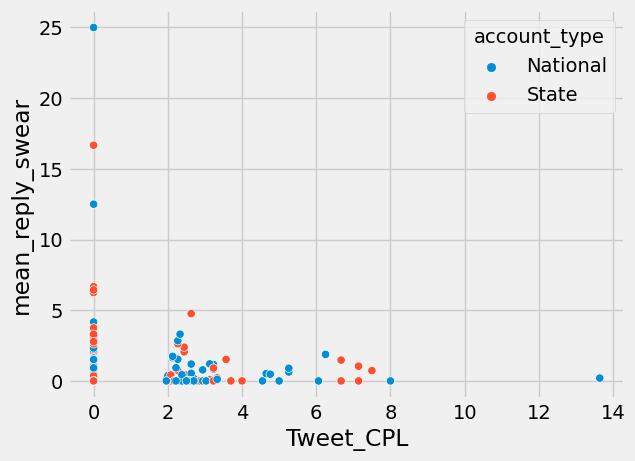

In [348]:
merge_df_reply
_ = sns.scatterplot(x="Tweet_CPL", y="mean_reply_swear", hue="account_type", data=merge_df_reply)


Base level Formula: $Y_{cj} = {\Pi}_{0} + \sum \limits _{j=1} ^{2} {\Pi}_{0j} + \sum \limits _{j=1} ^{2} X_{cj} {\alpha}_{j} $

[['National', 0.006672019148417356], ['State', 0.012297980532291414]]

,group,alpha
0,National,0.006672
1,State,0.012298


                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0095      0.003      3.372      0.184      -0.026       0.045
MSE=0.000


(-0.1, 0.2)

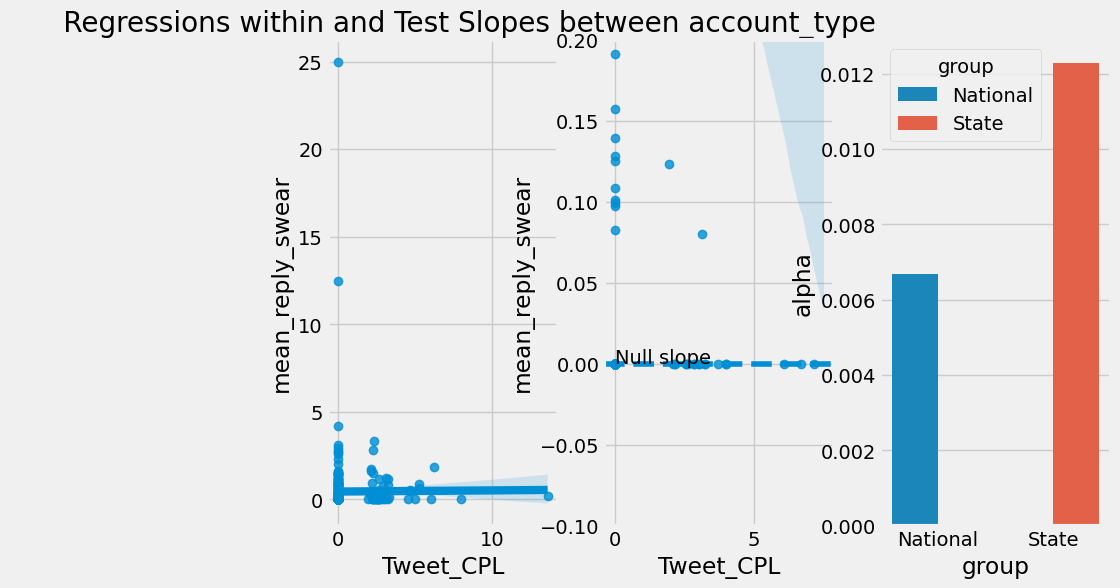

In [349]:
import statsmodels.formula.api as smf

x, y, group = 'Tweet_CPL', 'mean_reply_swear', 'account_type'

lv1 = [[group_lab, smf.ols('%s ~ %s' % (y, x), group_df).fit().params[x]]
       for group_lab, group_df in merge_df_reply.groupby(group)]

display(lv1)

# for group_lab, group_df in merge_df_reply.groupby(group):
#     display(group_lab)
#     display(group_df)

# Displaying author_name type and beta values
# lv1 = pd.DataFrame({'author_name' : [lv1[0][0], lv1[1][0], lv1[2][0], lv1[3][0], lv1[4][0], lv1[5][0], lv1[6][0], lv1[7][0], lv1[8][0], lv1[9][0]],\
#                     'alpha': [lv1[0][1], lv1[1][1], lv1[2][1], lv1[3][1], lv1[4][1], lv1[5][1], lv1[6][1], lv1[7][1], lv1[8][1], lv1[9][1]]})

lv1 = pd.DataFrame({'group' : [lv1[0][0], lv1[1][0]],\
                    'alpha': [lv1[0][1], lv1[1][1]]})
display(lv1)

# Level 2 model test alpha_Tweet_CPL != 0
lm_hm = smf.ols('alpha ~ 1', lv1).fit()
print(lm_hm.t_test('Intercept'))
print("MSE=%.3f" % lm_hm.mse_resid)

fig, axes = plt.subplots(1, 3, figsize=(9, 6))
for group_lab, group_df in merge_df_reply.groupby(group):
    if group_lab == 'National':
        sns.regplot(x=x, y=y, data=group_df, ax=axes[0])
    else:
        sns.regplot(x=x, y=y, data=group_df, ax=axes[1])
    
axes[0].set_title("      Regressions within and Test Slopes between %s" % group)

_ = sns.barplot(x='group', y="alpha", hue='group', data=lv1, ax=axes[2])
axes[1].axhline(0, ls='--')
axes[1].text(0, 0, "Null slope")
axes[1].set_ylim(-.1, 0.2)


                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0067      0.066      0.101      0.920      -0.124       0.137
MSE=2.771
Model parameters:
Intercept                          0.446619
account_type[T.State]              0.056873
Tweet_CPL                          0.006672
Tweet_CPL:account_type[T.State]    0.005626
dtype: float64
295
201


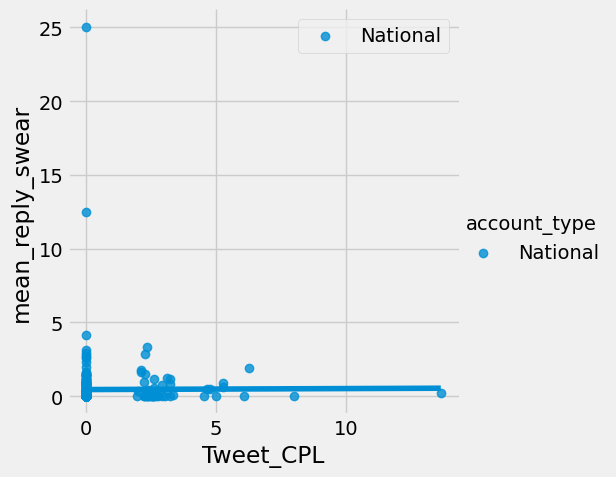

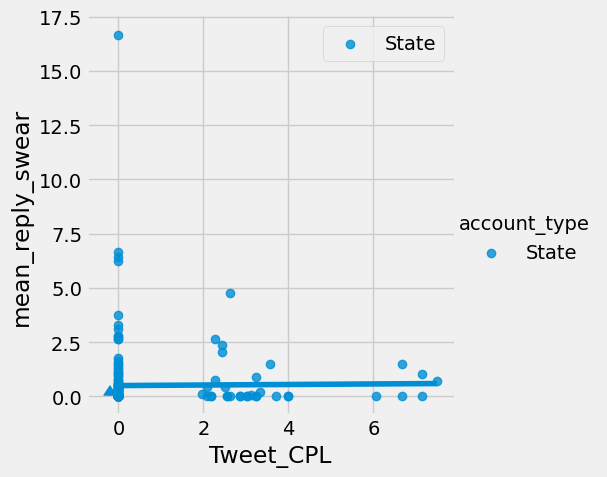

In [350]:
# Remove the outliers
# cols = ['i', 'we', 'Affect', 'tone_pos',
#        'tone_neg', 'emotion', 'emo_pos', 'emo_neg', 'emo_anx',
#        'emo_anger', 'emo_sad', 'swear', 'Social', 'socbehav', 'prosocial',
#        'conflict', 'moral', 'comm', 
#        'money', 'relig', 'death', 'risk', 'focuspast',
#        'focusfuture', 'Tweet_AS', 'Tweet_CPL',
#        'Tweet_agency', 'Tweet_value_communion', 'Tweet_power',
#        'mean_reply_i', 'mean_reply_we', 'mean_reply_Affect',
#        'mean_reply_tone_pos', 'mean_reply_tone_neg', 'mean_reply_emotion',
#        'mean_reply_emo_pos', 'mean_reply_emo_neg', 'mean_reply_emo_anx',
#        'mean_reply_emo_anger', 'mean_reply_emo_sad', 'mean_reply_swear',
#        'mean_reply_Social', 'mean_reply_socbehav', 'mean_reply_prosocial',
#        'mean_reply_polite', 'mean_reply_conflict', 'mean_reply_moral',
#        'mean_reply_comm', 'mean_reply_money', 'mean_reply_relig',
#        'mean_reply_death', 'mean_reply_risk', 'mean_reply_focuspast',
#        'mean_reply_focusfuture', 'mean_reply_AS', 'mean_reply_CPL',
#        'mean_reply_agency', 'mean_reply_communion', 'mean_reply_power'] 
# Q1 = merge_df_reply[cols].quantile(0.01)
# Q3 = merge_df_reply[cols].quantile(0.99)
# IQR = Q3 - Q1
# merge_df_reply = merge_df_reply[~((merge_df_reply[cols] < (Q1 - 1.5 * IQR)) |(merge_df_reply[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
# merge_df_reply

def plot_ancova_fullmodell(x, y, group, df, model, palette=sns.color_palette()):
    print(len(df))
    _ = sns.lmplot(x=x, y=y, hue=group, data=df, fit_reg=False)
    palette = itertools.cycle(palette)
    x_jitter = -0.2

    for group_lab, group_df in df.groupby(group):
        x_ = group_df[x]
        color = next(palette)
        try:
            group_offset = model.params["%s[T.%s]" % (group, group_lab)]
        except:
            group_offset = 0
        y_ = model.params['Intercept'] + model.params['Tweet_CPL'] * \
            x_ + group_offset
#         ax = sns.lineplot(x=x_, y=y_, color='k', linestyle='--')
        y_ = model.predict(df)
        ax = sns.lineplot(x=x_, y=y_, color=color)
        ax.arrow(0+x_jitter, model.params['Intercept'], 0, group_offset,
                 head_width=.3, length_includes_head=True, color=color)
        x_jitter += 0.2

# lv1 = [[group_lab, smf.ols('%s ~ %s' % (y, x), group_df).fit().params[x]]
#        for group_lab, group_df in merge_df_reply.groupby(group)]

ancova_full = smf.ols('mean_reply_swear ~ Tweet_CPL + account_type + Tweet_CPL:account_type', merge_df_reply).fit()

# Full model (including interaction) can use this notation:
# ancova_full = smf.ols('score ~ edu * classroom', df).fit()

# print(sm.stats.anova_lm(lm_fx, typ=3))
# print(lm_fx.summary())
print(ancova_full.t_test('Tweet_CPL'))
print("MSE=%.3f" % ancova_full.mse_resid)

print("Model parameters:")
print(ancova_full.params)

plot_ancova_fullmodell(x='Tweet_CPL', y='mean_reply_swear',
                      group='account_type', df=merge_df_reply.groupby('account_type').get_group('National'), model=ancova_full)

plot_ancova_fullmodell(x='Tweet_CPL', y='mean_reply_swear',
                      group='account_type', df=merge_df_reply.groupby('account_type').get_group('State'), model=ancova_full)


In [180]:
# # for x in df.columns:
# #     df[x] = df[x] - df[x].mean()
# temp_columns = ['Tweet_AS', 'Tweet_CPL', 'mean_reply_emo_sad', 'mean_reply_swear']

# print(len(merge_df_reply_group_list))
# print(len(merge_df_reply_account_type_group_list))


In [ ]:
from pandas import concat

# Substract by local group mean.
for idx in range(len(merge_df_reply_group_list)):
    for jdx in temp_columns:
#         if jdx == 'Tweet_AS':
        merge_df_reply_group_list[idx][jdx] = merge_df_reply_group_list[idx][jdx] - merge_df_reply_group_list[idx][jdx].mean()
#         elif jdx == 'Tweet_CPL':
#             merge_df_reply_group_list[idx][jdx] = merge_df_reply_group_list[idx][jdx] - merge_df_reply_group_list[idx][jdx].mean()
    merge_df_reply_group_list[idx]['ri_average'] = merge_df_reply_group_list[idx][['Tweet_AS', 'Tweet_CPL']].mean(axis=1)

temp_columns_1 = ['Tweet_ID', 'Tweet_AS', 'Tweet_CPL', 'mean_reply_emo_sad', 'mean_reply_swear', 'ri_average']

# Showing 15th dataframe
display(merge_df_reply_group_list[16][temp_columns_1].dropna())

for idx in range(len(merge_df_reply_account_type_group_list)):
    for jdx in temp_columns:
#         if jdx == 'Tweet_AS':
        merge_df_reply_group_list[idx][jdx] = merge_df_reply_group_list[idx][jdx] - merge_df_reply_group_list[idx][jdx].mean()
#         elif jdx == 'Tweet_CPL':
#             merge_df_reply_group_list[idx][jdx] = merge_df_reply_group_list[idx][jdx] - merge_df_reply_group_list[idx][jdx].mean()

temp_columns_1 = ['Tweet_ID', 'Tweet_AS', 'Tweet_CPL', 'mean_reply_emo_sad', 'mean_reply_swear', 'ri_average']

# Showing 15th dataframe
display(merge_df_reply_account_type_group_list[1][temp_columns_1].dropna())


In [ ]:
for idx in range(len(merge_df_reply_group_list)):
    temp_columns_1 = ['Tweet_AS', 'Tweet_CPL', 'mean_reply_emo_sad', 'mean_reply_swear', 'ri_average']
    print("\n\nFor Illinois username:= ", merge_df_reply_group_list[idx]['author_name'][0])
    display(merge_df_reply_group_list[idx][temp_columns_1].corr())
    
# for idx in range(len(merge_df_reply_account_type_group_list)):
#     print("\n\nFor Illinois Account Type:= ", merge_df_reply_account_type_group_list[idx]['author_name'][0])
#     display(merge_df_reply_account_type_group_list[idx][temp_columns_1].corr())

# mean_reply_swear ~ alpha + Tweet_AS + Tweet_CPL + error

In [ ]:
for idx in range(len(merge_df_reply_group_list)):
    print("For Illinois username:= ", merge_df_reply_group_list[idx]['author_name'][0])
    est = smf.ols(formula='mean_reply_swear ~ Tweet_AS +  Tweet_CPL', data=merge_df_reply_group_list[idx]).fit()
    print(est.summary()) 
    break

    # Random intercept
#     display(merge_df_reply_group_list[idx][['ri_average']][0:merge_df_reply_group_list[idx][['ri_average']].shape[0]].mean())

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    

In [ ]:
for idx in range(len(merge_df_reply_group_list)):
    print("\n**\n\nFor Illinois username:= ", merge_df_reply_group_list[idx]['author_name'][0])
    X = merge_df_reply_group_list[idx][['Tweet_AS', 'Tweet_CPL']]
    Y = merge_df_reply_group_list[idx]['mean_reply_swear']
    
    # Add constant in statsmodel alpha
    X = sm.add_constant(X)
    
    display(X.head())
    
    # fit model
    reg_res = sm.OLS(Y, X).fit()

    # Model Summary
    print(reg_res.summary())
    
    print('The constant term for the regression line is ', str(round(reg_res.params['const'], 2)))
    print('We predict that one additional Tweet_AS chnages that mean_reply_swear by ', str(round(reg_res.params['Tweet_AS'], 2)))
    print('We predict that one additional Tweet_CPL chnages that mean_reply_swear by ', str(round(reg_res.params['Tweet_CPL'], 2)))
    print('Tweet_AS and Tweet_CPL explain ', str(round(100 * reg_res.rsquared_adj, 1)), '% of the variance in mean_reply_swear')
    
    print("Model Prediction(MAX):= ", reg_res.predict([1, merge_df_reply_group_list[idx]['Tweet_AS'].max(), merge_df_reply_group_list[idx]['Tweet_CPL'].max()]))
    print("Model Prediction(MIN):= ", reg_res.predict([1, merge_df_reply_group_list[idx]['Tweet_AS'].min(), merge_df_reply_group_list[idx]['Tweet_CPL'].min()]))

    pred = reg_res.predict(X)
    merge_df_reply_group_list[idx]['pred_mean_reply_swear'] = pred
    display(merge_df_reply_group_list[idx][['Tweet_ID', 'Tweet_AS', 'Tweet_CPL', 'mean_reply_emo_sad', 'mean_reply_swear', 'pred_mean_reply_swear']].head())
    
    # Residual sum up to zero.
    print("Residual Sum:= ", sum(merge_df_reply_group_list[idx]['mean_reply_swear'] - merge_df_reply_group_list[idx]['pred_mean_reply_swear']))
        

In [ ]:
for idx in range(len(merge_df_reply_account_type_group_list)):
    print("\n**\n\nFor Illinois username:= ", merge_df_reply_account_type_group_list[idx]['account_type'][0])
    X = merge_df_reply_account_type_group_list[idx][['Tweet_AS', 'Tweet_CPL']]
    Y = merge_df_reply_account_type_group_list[idx]['mean_reply_swear']
    
    # Add constant in statsmodel 
    X = sm.add_constant(X)
    
    print("Number of Tweets from Government account: ", X.shape)
    display(X)
    
    # fit model
    reg_res = sm.OLS(Y, X).fit()

    # Model Summary
    print(reg_res.summary())
    
    print('The constant term for the regression line is ', str(round(reg_res.params['const'], 2)))
    print('We predict that one additional Tweet_AS chnages that mean_reply_swear by ', str(round(reg_res.params['Tweet_AS'], 2)))
    print('We predict that one additional Tweet_CPL chnages that mean_reply_swear by ', str(round(reg_res.params['Tweet_CPL'], 2)))
    print('Tweet_AS and Tweet_CPL explain ', str(round(100 * reg_res.rsquared_adj, 1)), '% of the variance in mean_reply_swear')
    
    print("Model Prediction(MAX):= ", reg_res.predict([1, merge_df_reply_account_type_group_list[idx]['Tweet_AS'].max(), merge_df_reply_account_type_group_list[idx]['Tweet_CPL'].max()]))
    print("Model Prediction(MIN):= ", reg_res.predict([1, merge_df_reply_account_type_group_list[idx]['Tweet_AS'].min(), merge_df_reply_account_type_group_list[idx]['Tweet_CPL'].min()]))

    pred = reg_res.predict(X)
    merge_df_reply_account_type_group_list[idx]['pred_mean_reply_swear'] = pred
    display(merge_df_reply_account_type_group_list[idx][['Tweet_ID', 'Tweet_AS', 'Tweet_CPL', 'mean_reply_swear', 'pred_mean_reply_swear']])
    
    # Residual sum up to zero.
    print("Residual Sum:= ", sum(merge_df_reply_account_type_group_list[idx]['mean_reply_swear'] - merge_df_reply_account_type_group_list[idx]['pred_mean_reply_swear']))


In [153]:
temp = idx.groupby('author_name')
temp = temp.getgroup('IDPH')
temp

AttributeError: 'DataFrameGroupBy' object has no attribute 'getgroup'

In [217]:
merge_df_reply['Month'] = merge_df_reply['Date'].dt.month
merge_df_reply['Quarter'] = merge_df_reply['Date'].dt.quarter
merge_df_reply = merge_df_reply.reset_index(drop=True)
merge_df_reply

# Remove the outliers
# cols = ['i', 'we', 'Affect', 'tone_pos',
#        'tone_neg', 'emotion', 'emo_pos', 'emo_neg', 'emo_anx',
#        'emo_anger', 'emo_sad', 'swear', 'Social', 'socbehav', 'prosocial',
#        'conflict', 'moral', 'comm', 
#        'money', 'relig', 'death', 'risk', 'focuspast',
#        'focusfuture', 'Tweet_AS', 'Tweet_CPL',
#        'Tweet_agency', 'Tweet_value_communion', 'Tweet_power',
#        'mean_reply_i', 'mean_reply_we', 'mean_reply_Affect',
#        'mean_reply_tone_pos', 'mean_reply_tone_neg', 'mean_reply_emotion',
#        'mean_reply_emo_pos', 'mean_reply_emo_neg', 'mean_reply_emo_anx',
#        'mean_reply_emo_anger', 'mean_reply_emo_sad', 'mean_reply_swear',
#        'mean_reply_Social', 'mean_reply_socbehav', 'mean_reply_prosocial',
#        'mean_reply_polite', 'mean_reply_conflict', 'mean_reply_moral',
#        'mean_reply_comm', 'mean_reply_money', 'mean_reply_relig',
#        'mean_reply_death', 'mean_reply_risk', 'mean_reply_focuspast',
#        'mean_reply_focusfuture', 'mean_reply_AS', 'mean_reply_CPL',
#        'mean_reply_agency', 'mean_reply_communion', 'mean_reply_power'] 
# Q1 = merge_df_reply[cols].quantile(0.01)
# Q3 = merge_df_reply[cols].quantile(0.99)
# IQR = Q3 - Q1
# merge_df_reply = merge_df_reply[~((merge_df_reply[cols] < (Q1 - 1.5 * IQR)) |(merge_df_reply[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
# merge_df_reply


,Date,Tweet_ID,Original_Tweet_Text,account_type,Updated_Clean_Text,i,we,Affect,tone_pos,tone_neg,...,POLICY_vaccination,POLICY_china,POLICY_masking,POLICY_quarantining,POLICY_testing,POLICY_handwashing,POLICY_wfh,POLICY_healthcare_workers,Month,Quarter
0,2020-03-01,1234189524454068225,Medical staff are on the frontlines of viral o...,National,Medical staff are on the frontlines of viral o...,0.00,0.00,2.33,0.00,2.33,...,-1,-1,-1,-1,-1,-1,-1,-1,3,1
1,2020-03-01,1233938224575320067,State of Illinois Public Health Officials Anno...,State,State of Illinois Public Health Officials Anno...,0.00,0.00,5.88,5.88,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,3,1
2,2020-03-01,1234148673497505793,"According to @CDCgov, it's important to wash y...",National,According to CDCgov it s important to wash you...,0.00,0.00,2.44,2.44,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,3,1
3,2020-03-02,1234564977819889667,I am continuing to monitor #COVID19. Our offic...,National,I am continuing to monitor COVID19 Our offices...,5.00,5.00,2.50,2.50,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,3,1
4,2020-03-02,1234583054720684033,While the risk to the general public in the U....,State,While the risk to the general public in the U ...,2.94,0.00,2.94,2.94,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,2020-12-31,1344765300106031104,Our veterans are heroes who bravely served us ...,National,Our veterans are heroes who bravely served us ...,2.50,7.50,10.00,10.00,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,12,4
4075,2020-12-31,1344732729187979265,"When President Trump tried to cut funding, I f...",National,When President Trump tried to cut funding I fo...,4.00,0.00,4.00,0.00,4.00,...,-1,-1,-1,-1,-1,-1,-1,-1,12,4
4076,2020-12-31,1344641105271390214,TODAY'S COVID-19 DATA UPDATE:\nPositivity rate...,State,TODAY S COVID 19 DATA UPDATE Positivity rate 8...,0.00,0.00,0.00,0.00,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,12,4
4077,2020-12-31,1344675993106186240,No plans for New Years' Eve? Here is a list of...,National,No plans for New Years Eve Here is a list of g...,0.00,0.00,18.18,18.18,0.00,...,-1,-1,-1,-1,-1,-1,-1,-1,12,4


                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0497      0.055      0.899      0.369      -0.059       0.158
MSE=1.719
Model parameters:
Intercept                                   0.411886
account_type[T.State]                       0.000466
Tweet_CPL                                   0.049681
Tweet_CPL:account_type[T.State]            -0.026040
Quarter                                     0.072665
account_type[T.State]:Quarter               0.000767
Tweet_CPL:account_type[National]:Quarter   -0.013572
Tweet_CPL:account_type[State]:Quarter      -0.004753
dtype: float64
481
1389
1051
1158


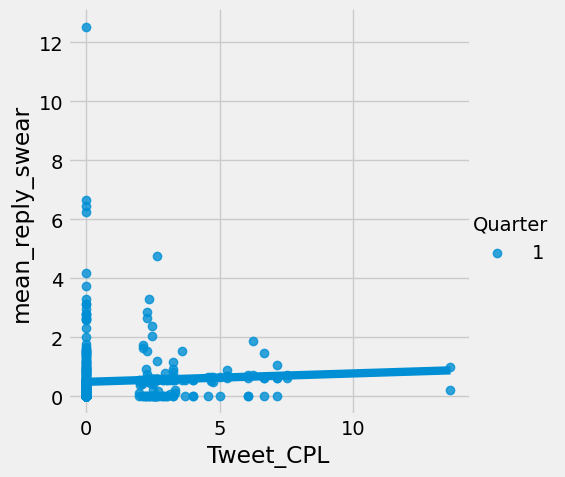

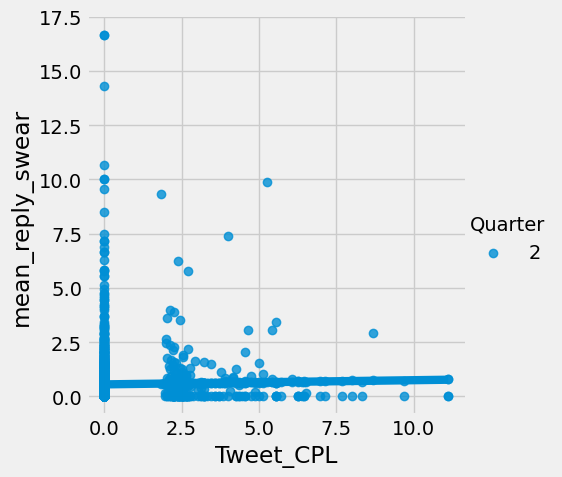

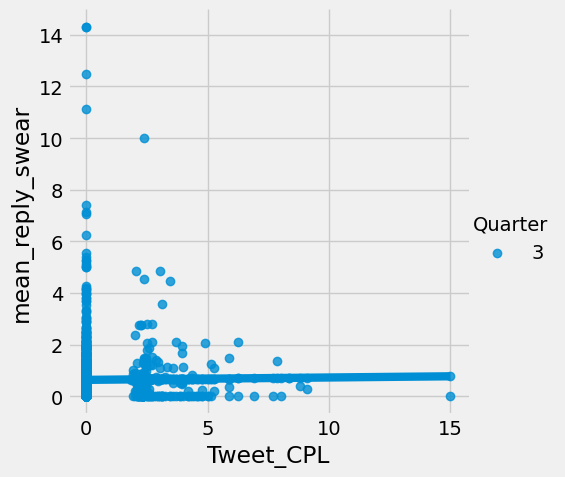

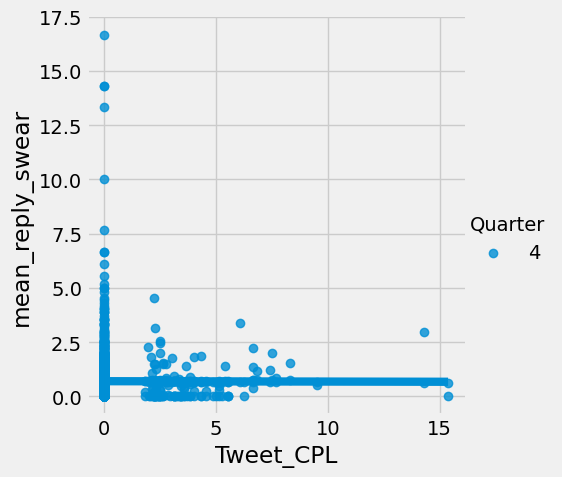

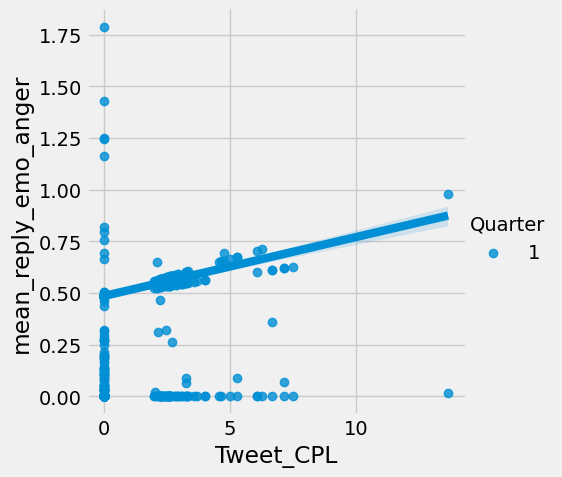

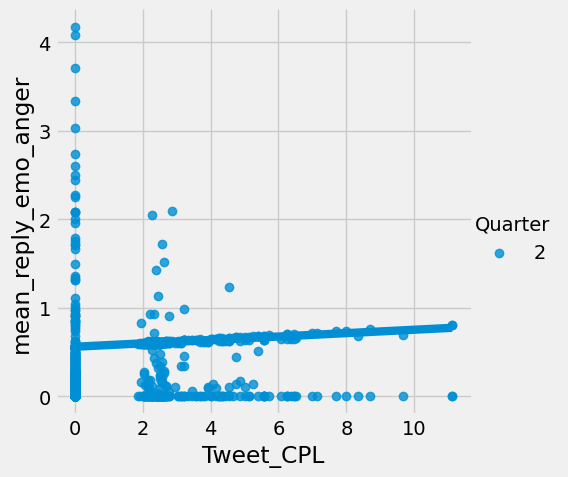

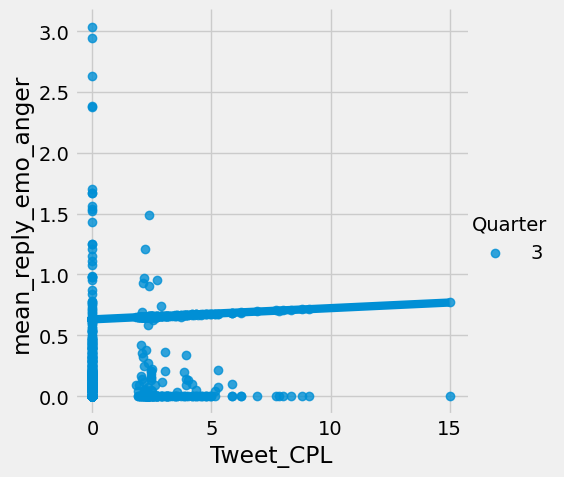

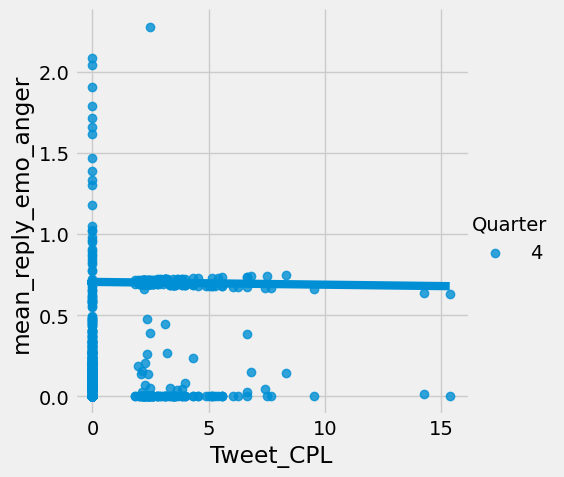

In [257]:
# Make a doc <- Meet tomorrow after 12 PM.

def plot_ancova_fullmodel_swear(x, y, group, df, model, palette=sns.color_palette()):
    _ = sns.lmplot(x=x, y=y, hue=group, data=df, fit_reg=False)
    palette = itertools.cycle(palette)
    x_jitter = -0.2

    for group_lab, group_df in df.groupby(group):
        print(len(group_df))
        x_ = group_df[x]
        color = next(palette)
        try:
            group_offset = model.params["%s[T.%s]" % (group, group_lab)]
        except:
            group_offset = 0
        y_ = model.params['Intercept'] + model.params['Tweet_CPL'] * x_ + group_offset
        y_ = model.predict(df)
        lv1 = pd.DataFrame({'Tweet_CPL' : x_, 'mean_reply_swear': y_})
        ax = sns.regplot(x='Tweet_CPL', y='mean_reply_swear', data=lv1, fit_reg=True)
        ax.arrow(0+x_jitter, model.params['Intercept'], 0, group_offset,
                 head_width=.3, length_includes_head=True, color=color)
        x_jitter += 0.2
        
def plot_ancova_fullmodel_anger(x, y, group, df, model, palette=sns.color_palette()):
    _ = sns.lmplot(x=x, y=y, hue=group, data=df, fit_reg=False)
    palette = itertools.cycle(palette)
    x_jitter = -0.2

    for group_lab, group_df in df.groupby(group):
        x_ = group_df[x]
        color = next(palette)
        try:
            group_offset = model.params["%s[T.%s]" % (group, group_lab)]
        except:
            group_offset = 0
        y_ = model.params['Intercept'] + model.params['Tweet_CPL'] * x_ + group_offset
        y_ = model.predict(df)
        lv1 = pd.DataFrame({'Tweet_CPL' : x_, 'mean_reply_emo_anger': y_})
        ax = sns.regplot(x='Tweet_CPL', y='mean_reply_emo_anger', data=lv1, fit_reg=True)
        ax.arrow(0+x_jitter, model.params['Intercept'], 0, group_offset,
                 head_width=.3, length_includes_head=True, color=color)
        x_jitter += 0.2

ancova_full = smf.ols('mean_reply_swear ~ Tweet_CPL +  account_type + Quarter +  account_type: Quarter + Tweet_CPL:account_type + Tweet_CPL :account_type: Quarter', merge_df_reply).fit()
print(ancova_full.t_test('Tweet_CPL'))
print("MSE=%.3f" % ancova_full.mse_resid)

print("Model parameters:")
print(ancova_full.params)

plot_ancova_fullmodel_swear(x='Tweet_CPL', y='mean_reply_swear',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(1), model=ancova_full)

plot_ancova_fullmodel_swear(x='Tweet_CPL', y='mean_reply_swear',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(2), model=ancova_full)

plot_ancova_fullmodel_swear(x='Tweet_CPL', y='mean_reply_swear',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(3), model=ancova_full)

plot_ancova_fullmodel_swear(x='Tweet_CPL', y='mean_reply_swear',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(4), model=ancova_full)

plot_ancova_fullmodel_anger(x='Tweet_CPL', y='mean_reply_emo_anger',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(1), model=ancova_full)

plot_ancova_fullmodel_anger(x='Tweet_CPL', y='mean_reply_emo_anger',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(2), model=ancova_full)

plot_ancova_fullmodel_anger(x='Tweet_CPL', y='mean_reply_emo_anger',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(3), model=ancova_full)

plot_ancova_fullmodel_anger(x='Tweet_CPL', y='mean_reply_emo_anger',
                      group='Quarter', df=merge_df_reply.groupby('Quarter').get_group(4), model=ancova_full)